In [4]:
# import library
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

#import spacy

In [5]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')


In [6]:
data_com = train_data.append(test_data, ignore_index = True, sort = False)

In [7]:
data_com.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2.0
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2.0
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2.0
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2.0
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1.0


In [8]:
data_com.dtypes

unique_hash     object
text            object
drug            object
sentiment      float64
dtype: object

In [9]:
data_com['text'][1]

'I can completely understand why you’d want to try it. But, results reported in lectures don’t always stand up to the scrutiny of peer-review during publication. There so much still to do before this is convincing. I hope that it does work out, I really do. And if you’re aware of and happy with the risks, then that’s great. I just think it’s important to present this in a balanced way, and to understand why we don’t move straight from the first show of promise in an animal study to using drugs on humans. There’s still a lot of animal data to gather, and human data to gather before anyone can tell if it’s safe or effective. I can’t tell you how many times animal studies don’t follow through to humans, but it’s one of the major attrition points in drug development. You’ve been through some of the unpredictability issues with Cladribine/Gilenya, where there was an interaction that wasn’t predicted. But once people try it, the doctors can see patterns and work out what’s going on. Clemasti

In [10]:
data_com['clean_text'] = data_com['text'].str.replace("[^a-zA-Z#]", " ")

In [11]:
data_com.head()

,unique_hash,text,drug,sentiment,clean_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2.0,Autoimmune diseases tend to come in clusters ...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2.0,I can completely understand why you d want to ...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2.0,Interesting that it only targets S P recep...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2.0,Very interesting grand merci Now I wonder wh...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1.0,Hi everybody My latest MRI results for Brain ...


In [12]:
data_com['clean_text'][2]

'Interesting that it only targets S P     receptors rather than     like Fingolimod  Hoping to soon see what the AEs and SAEs were Yes  I m not sure what this means  exactly   Quote Nine patients reported serious adverse events    mg                     mg                   mg                and      mg               no serious adverse event was reported for more than   patient and no new safety signals occurred compared with the BOLD Study  If there were   patients reporting SAEs  how can it be stated that  no serious adverse event was reported for more than   patient      Maybe I haven t read this right  or maybe there s a misprint  I m very pleased that something is being developed for SPMS  and it s encouraging that siponimod doesn t linger for very long in the body '

In [16]:
data_com['clean_text'] = data_com["clean_text"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
data_com['clean_text'][2]

'Interesting that only targets receptors rather than like Fingolimod Hoping soon what SAEs were sure what this means exactly Quote Nine patients reported serious adverse events serious adverse event reported more than patient safety signals occurred compared with BOLD Study there were patients reporting SAEs stated that serious adverse event reported more than patient Maybe haven read this right maybe there misprint very pleased that something being developed SPMS encouraging that siponimod doesn linger very long body'

In [18]:
data_com['clean_text'] = data_com['clean_text'].str.lower()

In [19]:
data_com['clean_text'][2]

'interesting that only targets receptors rather than like fingolimod hoping soon what saes were sure what this means exactly quote nine patients reported serious adverse events serious adverse event reported more than patient safety signals occurred compared with bold study there were patients reporting saes stated that serious adverse event reported more than patient maybe haven read this right maybe there misprint very pleased that something being developed spms encouraging that siponimod doesn linger very long body'

In [20]:
tokenized_text = data_com['clean_text'].apply(lambda x:x.split())

In [21]:
tokenized_text.head()

0    [autoimmune, diseases, tend, come, clusters, g...
1    [completely, understand, want, results, report...
2    [interesting, that, only, targets, receptors, ...
3    [very, interesting, grand, merci, wonder, wher...
4    [everybody, latest, results, brain, cervical, ...
Name: clean_text, dtype: object

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_text = tokenized_text.apply(lambda x:[stemmer.stem(i) for i in x])


In [23]:
tokenized_text.head()

0    [autoimmun, diseas, tend, come, cluster, gilen...
1    [complet, understand, want, result, report, le...
2    [interest, that, onli, target, receptor, rathe...
3    [veri, interest, grand, merci, wonder, where, ...
4    [everybodi, latest, result, brain, cervic, cor...
Name: clean_text, dtype: object

In [24]:
for i in range(len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
data_com['clean_text'] = tokenized_text

In [25]:
data_com['clean_text'][2]

'interest that onli target receptor rather than like fingolimod hope soon what sae were sure what thi mean exactli quot nine patient report seriou advers event seriou advers event report more than patient safeti signal occur compar with bold studi there were patient report sae state that seriou advers event report more than patient mayb haven read thi right mayb there misprint veri pleas that someth be develop spm encourag that siponimod doesn linger veri long bodi'

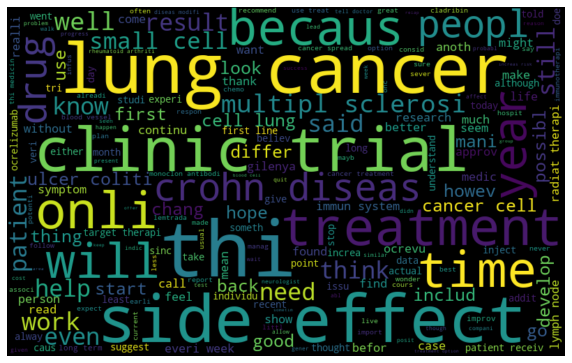

In [26]:
all_words = ' '.join([text for text in data_com['clean_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800,
                     height = 500,
                     random_state = 21,
                     max_font_size = 110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [30]:
data_com['drug'].value_counts()

ocrevus                         978
gilenya                         977
ocrelizumab                     602
entyvio                         486
humira                          458
remicade                        403
opdivo                          354
tarceva                         344
fingolimod                      343
keytruda                        314
cladribine                      300
tagrisso                        286
stelara                         267
alimta                          229
lucentis                        114
eylea                            98
cimzia                           86
avastin                          83
nivolumab                        73
simponi                          66
crizotinib                       66
vitrectomy                       64
alectinib                        62
erlotinib                        61
tecentriq                        51
pembrolizumab                    50
osimertinib                      48
xalkori                     

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vector = CountVectorizer(max_df = 0.90,
                            min_df = 2,
                            max_features = 1000,
                            stop_words = 'english')
bow = bow_vector.fit_transform(data_com['clean_text'])

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(max_df = 0.90,
                              min_df = 2,
                              max_features = 1000,
                              stop_words = 'english')
tfidf = tfidf_vector.fit_transform(data_com['clean_text'])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_bow = bow[:5279, :]
test_bow = bow[5279:, :]

X_train, X_valid, y_train, y_valid = train_test_split(train_bow, train_data['sentiment'],
                                                     random_state = 42, 
                                                      test_size = 0.3)

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.partial_fit(X_train, y_train)
prediction = gnb.predict_proba(X_valid)
prediction_int = prediction[:,1]>0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_valid, prediction_int)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.